In [55]:
import networkx as nx

G = nx.Graph()
G = nx.read_gml('power_grid.gml', label=None)

In [56]:
def is_acyclic(G):
    return nx.cycle_basis(G) == []

def print_relevant_info(G):
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())
    print("Network has no cycles: ", is_acyclic(G))

print_relevant_info(G)

Number of nodes:  4941
Number of edges:  6594
Network has no cycles:  False


In [57]:
#print(nx.average_shortest_path_length(G))
print(18.989185424445708)

18.989185424445708


In [58]:
def bfs_by_radius(G, node, max_dist):
    visited = [node]
    queue = [node]
    distance = [-1]*(G.number_of_nodes() + 1)
    distance [node] = 0
    while queue:
        node = queue.pop(0)
        for neighbour in G.neighbors(node):
            if neighbour not in visited and distance[node] + 1 <= max_dist:
                visited.append(neighbour)
                queue.append(neighbour)
                distance[neighbour] = distance[node] + 1
    return len(visited)

def radial_centrality(G, radius=4):
    centrality = {}
    for node in G.nodes:
        centrality[node] = bfs_by_radius(G, node, radius)
    return centrality
        

In [59]:
def get_best_nodes_by_centrality(centrality_funtion, G, number_of_nodes):
    centrality_values = centrality_funtion(G)
    amount = 0
    aux = list((b, a) for a, b in centrality_values.items())
    aux.sort(reverse=True)
    ret = []
    for i in aux:
        if amount >= number_of_nodes:
            break
        amount += 1
        ret.append(i)
    return ret


In [60]:
def get_intersection(list1, list2):
    return list(set(list1) & set(list2))

def get_intersections(result1, result2, max_size):
    list1 = []
    list2 = []
    result = [[]]
    for size in range(max_size):
        list1.append(result1[size][1])
        list2.append(result2[size][1])
        result.append(get_intersection(list1, list2))
    return result


In [61]:
best = []
amount = 60
best.append(get_best_nodes_by_centrality(nx.degree_centrality, G, amount))                      #degree centrality      (0)
print(0)
best.append(get_best_nodes_by_centrality(nx.pagerank, G, amount))                               #pagerank               (1)
print(1)

0
1


In [62]:
print([v for u,v in best[0]], end='\n\n')
print([v for u,v in best[1]], end='\n\n')

[2553, 4458, 4345, 3468, 831, 3895, 2585, 2575, 2542, 2382, 2662, 2617, 2439, 2434, 1224, 4395, 4384, 4381, 4373, 4352, 4332, 2282, 1334, 1309, 1005, 490, 4402, 4392, 4361, 4359, 4346, 3838, 3355, 3312, 3128, 2936, 2851, 2800, 2717, 2608, 2586, 2554, 2533, 1460, 1326, 1170, 1166, 1106, 1091, 1050, 1030, 725, 4878, 4391, 4342, 4336, 4199, 3351, 3329, 2959]

[4458, 831, 3468, 2553, 1224, 597, 2382, 2575, 2439, 3895, 3355, 2434, 2542, 2617, 2647, 2282, 1005, 4520, 1030, 1334, 2585, 1326, 4878, 490, 4224, 725, 1554, 1460, 3838, 1106, 2321, 98, 274, 2662, 2249, 2717, 3312, 846, 2586, 2608, 1309, 848, 88, 3979, 3351, 3329, 1166, 3431, 2936, 1091, 129, 2548, 2493, 854, 1098, 2800, 4209, 4199, 803, 3411]



In [63]:
aux = [len(x) for x in get_intersections(best[0], best[1], amount)]
print(aux[-1], end = '\n')

38


In [64]:
generators = get_intersection([x[1] for x in best[0]], [x[1] for x in best[1]])

print(generators, len(generators))

[3329, 2434, 1030, 2439, 3468, 4878, 2575, 1166, 3351, 2585, 2586, 3355, 1309, 2717, 1326, 2608, 1460, 1334, 3895, 2617, 831, 1091, 1224, 2382, 1106, 725, 2662, 4199, 4458, 2282, 490, 1005, 2542, 3312, 2800, 2936, 2553, 3838] 38


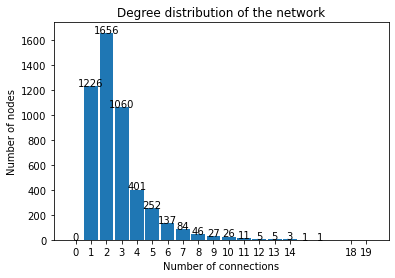

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

degree_distribution = {}
for i in G.degree:
    if i[1] in degree_distribution:
        degree_distribution[i[1]] += 1
    else:
        degree_distribution[i[1]] = 1

aux = [(x, y) for (x, y) in degree_distribution.items()]
aux.sort()
x = [0]
y = [0]

for i in aux:
    x.append(i[0])
    y.append(i[1])

plt.bar(x, y, tick_label=[str(val) for val in x], width=0.9)
plt.title("Degree distribution of the network")

addlabels(x,y)
plt.xlabel("Number of connections")
plt.ylabel("Number of nodes")
plt.savefig("Deg_distribution.jpg", dpi=300)
plt.show()

In [66]:
from matplotlib import pylab
pos = nx.spring_layout(G)


In [67]:
def save_graph(graph,file_name, color_edges = ['#ffdc73' for u, v in G.edges]):
    plt.figure(num=None, figsize=(30, 30), dpi=160)
    plt.axis('off')
    fig = plt.figure(1)
    
    nx.draw_networkx(graph, pos, with_labels=False, node_size=size_node, node_color=colors, edge_color=color_edges)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    xmin = cut * min(xx for xx, yy in pos.values())
    ymin = cut * min(yy for xx, yy in pos.values())
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig


In [68]:
colors = []
size_node = []
edges_color = '#ffdc73'

def set_colors(gen_color, norm_color, terminal_color):
    global colors
    global size_node
    colors = []
    size_node = []
    for node in G.nodes:
        if node in generators:
            colors.append(gen_color)
            size_node.append(160)
        else:
            if G.degree[node] != 1:
                colors.append(norm_color)
                size_node.append(20)
            else:
                colors.append(terminal_color)
                size_node.append(40)

set_colors('#23ccad', '#c70039', 'black')
save_graph(G,"generators_graph.jpg")
colors = 'black'
size_node = 40
save_graph(G, "initial_draw.jpg")


In [69]:
def BFS_family(G, init_node, distances_family):
    queue = [init_node]
    distances_family [init_node] = (0, init_node)
    while queue:
        node = queue.pop(0)
        for neighbour in G.neighbors(node):
            if distances_family[node][0] + 1 <= distances_family[neighbour][0]:
                queue.append(neighbour)
                distances_family[neighbour] = (distances_family[node][0] + 1, init_node)
    return distances_family

def calculate_distances(G, list_of_generators):
    distances_family = [(100, -1)]*(G.number_of_nodes() + 1)
    #(distance, family)

    for node in list_of_generators:
        distances_family = BFS_family(G, node, distances_family)

    return distances_family

distances_family = calculate_distances(G, generators)
#print(distances_family)

In [70]:
def get_communities(G, list_of_generators):
    communities = {}
    distances_family = calculate_distances(G, list_of_generators)
    for node in G.nodes:
        family = distances_family[node][1]
        if family not in communities.keys():
            communities[family] = [node]
        else:
            communities[family].append(node)
    return communities
        
communities = get_communities(G, generators)

colors = []
size_node = []

usable_colors = {}
for i in range(len(generators)):
    usable_colors[generators[i]] = float(i)/float(len(generators))

for node in G.nodes:
    family = distances_family[node][1]
    colors.append(usable_colors[family])
    if node in generators:
        size_node.append(250)
    else:
        size_node.append(50)

edges_color = []

for u,v in G.edges:
    family_u = distances_family[u][1]
    family_v = distances_family[v][1]
    if family_u == family_v:
        edges_color.append(usable_colors[family_u])
    else:
        edges_color.append(1)

save_graph(G,"communities.jpg", color_edges=edges_color)


In [71]:
for i in communities.keys():
    print("Size of community of ", i,": ", len(communities[i]), sep='')

Size of community of 2282: 245
Size of community of 3329: 210
Size of community of 3355: 44
Size of community of 1091: 391
Size of community of 1030: 213
Size of community of 4458: 318
Size of community of 725: 179
Size of community of 1309: 262
Size of community of 1326: 94
Size of community of 1334: 85
Size of community of 4199: 211
Size of community of 490: 140
Size of community of 2382: 143
Size of community of 831: 68
Size of community of 1005: 72
Size of community of 1166: 117
Size of community of 1106: 396
Size of community of 1224: 69
Size of community of 1460: 87
Size of community of 2617: 210
Size of community of 3312: 467
Size of community of 2542: 95
Size of community of 2586: 110
Size of community of 2434: 68
Size of community of 2439: 24
Size of community of 2575: 15
Size of community of 2717: 108
Size of community of 2553: 79
Size of community of 2608: 84
Size of community of 2936: 34
Size of community of 2585: 18
Size of community of 2662: 32
Size of community of 2800: 

In [72]:
def save_graph_community(graph,file_name, list_of_nodes, color, big_size=1500):
    plt.figure(num=None, figsize=(30, 30), dpi=160)
    plt.axis('off')
    fig = plt.figure(1)

    size_of_nodes = []
    for node in list_of_nodes:
        if node not in generators:
            size_of_nodes.append(100)
        else:
            size_of_nodes.append(big_size)

    list_of_edges = []
    for u, v in G.edges:
        if u in list_of_nodes and v in list_of_nodes:
            list_of_edges.append((u,v))

    nx.draw_networkx(graph, pos, with_labels=False, edgelist=list_of_edges, nodelist=list_of_nodes, node_size=size_of_nodes, node_color=color, edge_color=color)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    xmin = cut * min(xx for xx, yy in pos.values())
    ymin = cut * min(yy for xx, yy in pos.values())
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

In [73]:
size_of_communities = [len(communities[main_node]) for main_node in generators]
i = 0
list_of_colors = ['#e6194B', '#3cb44b', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#469990', '#9A6324', '#800000', '#808000', '#000075', '#a9a9a9', '#000000']
for main_node in communities.keys():
    if len(communities[main_node]) >= 0:
        i += 1
        actual_name = "communities/Community_size_"+str(len(communities[main_node]))+"_Node_"+str(main_node)+".jpg"
        save_graph_community(G, actual_name, communities[main_node], list_of_colors[i%len(list_of_colors)])

2434 2662 68 32
2585 2586 18 110
2585 2717 18 108
1091 1166 391 117
490 2542 140 95
3312 3351 467 16


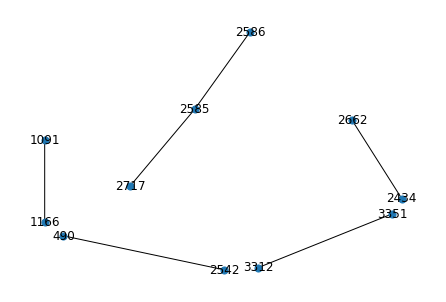

In [74]:
def distance_between_generators(G, list_of_generators):
    distance = [[0 for x in range(len(list_of_generators))] for y in range(len(list_of_generators))]
    for i in range(len(list_of_generators)):
        initial = list_of_generators[i]
        distances = nx.shortest_path_length(G, source=initial)
        for j in range(len(list_of_generators)):
            final = list_of_generators[j]
            distance[i][j] = distances[final]

    return distance

distances_generators = distance_between_generators(G, generators)
closest_generators = []
G_new_1 = nx.Graph()
for i in range(len(generators)):
    for j in range(len(generators)):
        if generators[i] < generators[j] and distances_generators[i][j] == 1:
            print(generators[i], generators[j], len(communities[generators[i]]), len(communities[generators[j]]))
            G_new_1.add_edge(generators[i], generators[j])
nx.draw_kamada_kawai(G_new_1, node_size=50, with_labels=True)

2434 2586 68 110
2434 2608 68 84
2439 2617 24 210
2575 2608 15 84
2575 2936 15 34
1166 1334 117 85
2586 2717 110 108
1224 1326 69 94
490 2800 140 21
2542 2800 95 21


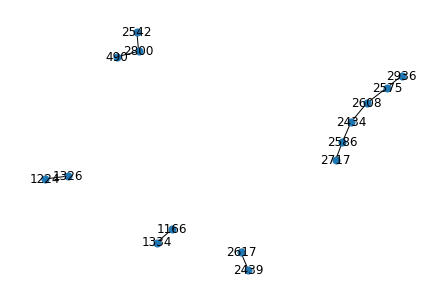

In [75]:
closest_generators = []
G_new_2 = nx.Graph()
for i in range(len(generators)):
    for j in range(len(generators)):
        if generators[i] < generators[j] and distances_generators[i][j] == 2:
            print(generators[i], generators[j], len(communities[generators[i]]), len(communities[generators[j]]))
            G_new_2.add_edge(generators[i], generators[j])
nx.draw(G_new_2, node_size=50, with_labels=True)

In [76]:
def get_capacities(G, list_of_generators):
    capacities = {}
    communities = get_communities(G, list_of_generators)
    for generator in communities.keys():
        capacities[generator] = len(communities[generator])
    return capacities

def shutdown_generator(G, closed_gen, list_of_generators, ratio=2):
    G2 = nx.Graph()
    G2 = G.copy()
    capacities_original = get_capacities(G2, list_of_generators)

    removed_nodes = []
    nodes_to_remove = [closed_gen]
    while nodes_to_remove:
        node_to_remove = nodes_to_remove.pop(0)
        removed_nodes.append(node_to_remove)
        list_of_generators.remove(node_to_remove)
        new_capacities = get_capacities(G2, list_of_generators)
        for node in list_of_generators:
            if new_capacities[node] > ratio*capacities_original[node]:
                if node not in nodes_to_remove:
                    nodes_to_remove.append(node)
    return removed_nodes
    
def simmulate_shutdowns(G, list_of_generators):   
    for generator in list_of_generators:
        aux_list = list_of_generators.copy()
        affected_generators = shutdown_generator(G, generator, aux_list)
        if(len(affected_generators)>0):
            print(generator,len(affected_generators))

simmulate_shutdowns(G, generators)


3329 1
2434 2
1030 3
2439 1
3468 1
4878 1
2575 1
1166 1
3351 1
2585 1
2586 2
3355 1
1309 2
2717 3
1326 1
2608 2
1460 1
1334 1
3895 1
2617 38
831 1
1091 38
1224 1
2382 1
1106 38
725 1
2662 1
4199 38
4458 38
2282 1
490 38
1005 1
2542 1
3312 38
2800 1
2936 2
2553 5
3838 1


In [77]:
G_new = G.copy()
from itertools import combinations

for u,v in combinations(generators, 2):
    G_new.add_edge(u,v)

simmulate_shutdowns(G_new, generators)

3329 5
2434 5
1030 5
2439 1
3468 1
4878 5
2575 1
1166 5
3351 1
2585 1
2586 5
3355 1
1309 38
2717 5
1326 5
2608 7
1460 5
1334 5
3895 1
2617 6
831 5
1091 38
1224 1
2382 5
1106 5
725 5
2662 1
4199 5
4458 5
2282 5
490 5
1005 5
2542 5
3312 38
2800 1
2936 1
2553 1
3838 1
